### Objective:
To classify images in the Caltech-256 dataset, which is an improvement over Caltech-101 dataset using a Convolutional Neural Network.

### Problem Statement
To build and implement a Convolutional Neural Network model to classify images in the Caltech-256 dataset.

At the end of this competition, you will be able to:

* Load and extract features of images available in the Caltech-256 dataset using ImageDataGenerator

* Build convolutional neural networks using either Keras or PyTorch deep learning libraries

* Use the pre-trained models using either Keras or PyTorch deep learning libraries

### Description:
Caltech-256 is an object recognition dataset containing approximately 30,000 real-world images, of different sizes, spanning 256 classes (256 object classes and an additional clutter class). Each class is represented by at least 80 images. The dataset is a superset of the Caltech-101 dataset.

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at https://www.kaggle.com/t/185418aa7ed24db3b98ed851a4db2b41 and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)



### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kshitijdesai","key":"083b272cfa48c824c0632a2de12465a4"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [3]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.1 requires urllib3>=1.25, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [7]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-caltech-256-images

100% 315M/316M [00:18<00:00, 19.5MB/s]
100% 316M/316M [00:18<00:00, 18.2MB/s]


In [8]:
!unzip classification-of-caltech-256-images

Streaming output truncated to the last 5000 lines.
  inflating: test/4759.jpg           
  inflating: test/476.jpg            
  inflating: test/4760.jpg           
  inflating: test/4761.jpg           
  inflating: test/4762.jpg           
  inflating: test/4763.jpg           
  inflating: test/4764.jpg           
  inflating: test/4765.jpg           
  inflating: test/4766.jpg           
  inflating: test/4767.jpg           
  inflating: test/4768.jpg           
  inflating: test/4769.jpg           
  inflating: test/477.jpg            
  inflating: test/4770.jpg           
  inflating: test/4771.jpg           
  inflating: test/4772.jpg           
  inflating: test/4773.jpg           
  inflating: test/4774.jpg           
  inflating: test/4775.jpg           
  inflating: test/4776.jpg           
  inflating: test/4777.jpg           
  inflating: test/4778.jpg           
  inflating: test/4779.jpg           
  inflating: test/478.jpg            
  inflating: test/4780.jpg           

### 7. Download the Train Data

In [9]:
%%capture
!wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Caltech_256_Train.zip

!unzip "Caltech_256_Train.zip"

## Grading = 10 Marks

## YOUR CODING STARTS FROM HERE

### Import Required packages

In [20]:
import numpy as np
from PIL import Image
import pandas as pd

import datetime
import random
from copy import deepcopy
from torch.utils.tensorboard import SummaryWriter
from torchvision.transforms import Normalize
from torch.optim.lr_scheduler import LambdaLR

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, ToPILImage, CenterCrop, RandomResizedCrop,RandomHorizontalFlip
from torchvision.datasets import ImageFolder
from torchvision.models import alexnet, resnet18, inception_v3

# Updated for Torchvision 0.15
from torchvision.models.alexnet import AlexNet_Weights
from torchvision.models.inception import Inception_V3_Weights
from torchvision.models.resnet import ResNet18_Weights
# from torchvision.models.alexnet import model_urls

try:
    from torchvision.models.utils import load_state_dict_from_url
except ImportError:
    from torch.hub import load_state_dict_from_url

from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.models import vit_h_14

### **Stage 1:** Data Loading and preprocessing of Images (3 points)

#### Analyze the shape of images and distribution of classes

In [13]:
# YOUR CODE HERE
directory = '/content/Caltech_256_Train'
classes = [j for j in os.listdir(directory)]
classes_num = [i for i in range(len(classes))]
image_dict = {}
for i,h in enumerate(classes):
    image_dict[i]=[]
    j = directory+'/'+h
    classi = [j+'/'+k for k in os.listdir(j)]
    image_dict[i].extend(classi)

In [14]:
print(len(classes))

256


#### Visualize the sample images of each class


Skateboard
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=293x200 at 0x7AE3251386D0>


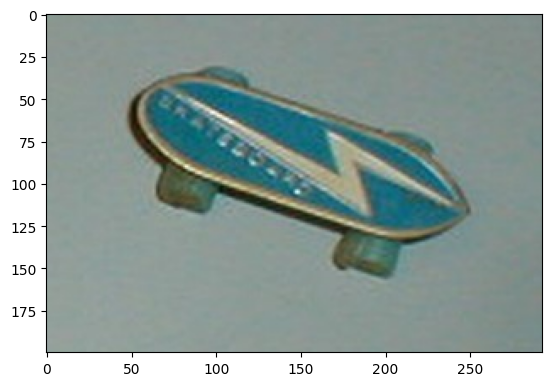

In [15]:
# YOUR CODE HERE
for i in classes[:1]:
    j = directory+'/'+i
    classi = [k for k in os.listdir(j)]
    for l in classi[:1]:
        m = j+'/'+l
        n = Image.open(m)
        print(i)
        print(n)
        plt.imshow(n)
        plt.show()

### **Stage 2:** Build and train the CNN model using Keras/Pytorch (5 points)

You can train the CNN model and Pre-trained model and then compare the model performance on the kaggle testset


### Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



#### Use the pre-trained models

* Load the pre-trained model
* Train and evaluate the images

In [16]:
class customImageDataset(Dataset):
    def __init__(self,image_dict,transform=None):
        self.image_dict = image_dict
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for class_label, paths in image_dict.items():
            for image_path in paths:
                self.image_paths.append(image_path)
                self.labels.append(class_label)


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]

        image = Image.open(image_path)

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [42]:


class StepByStep(object):

    def __init__(self, model, loss_fn, optimizer):
        ####################
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model.to(self.device)
        ####################

        ####################
        self.train_loader = None
        self.val_loader = None
        self.writer = None
        self.scheduler = None
        self.is_batch_lr_scheduler = False
        ####################

        ####################
        self.losses = []
        self.val_losses = []
        self.learning_rates = []
        self.total_epochs = 0
        self.visualization = {}
        self.handles = {}
        ####################

        ####################
        self.train_step_fn = self._make_train_step_fn()
        self.val_step_fn = self._make_val_step_fn()
        ####################


    def to(self, device):
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)



    def set_loaders(self, train_loader, val_loader=None):
        self.train_loader = train_loader
        self.val_loader = val_loader



    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)
        random.seed(seed)
        try:
            self.train_loader.sampler.generator.manual_seed(seed)
        except AttributeError:
            pass



    def _make_train_step_fn(self):
        def perform_train_step_fn(x, y):
            self.model.train()
            yhat = self.model(x)
            loss = self.loss_fn(yhat, y)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            return loss.item()
        return perform_train_step_fn



    def _make_val_step_fn(self):
        def perform_val_step_fn(x, y):
            self.model.eval()
            yhat = self.model(x)
            loss = self.loss_fn(yhat, y)
            return loss.item()
        return perform_val_step_fn



    def _mini_batch(self, validation=False):
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn
        if data_loader is None:
            return None
        n_batches = len(data_loader)
        mini_batch_losses = []
        for i, (x_batch, y_batch) in enumerate(data_loader):
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)
            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)
            if not validation:
                self._mini_batch_schedulers(i / n_batches)
        loss = np.mean(mini_batch_losses)
        return loss



    def set_optimizer(self, optimizer):
        self.optimizer = optimizer



    def _epoch_schedulers(self, val_loss):
        if self.scheduler:
            if not self.is_batch_lr_scheduler:
                if isinstance(self.scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                    self.scheduler.step(val_loss)
                else:
                    self.scheduler.step()

                current_lr = list(map(lambda d: d['lr'], self.scheduler.optimizer.state_dict()['param_groups']))
                self.learning_rates.append(current_lr)



    def _mini_batch_schedulers(self, frac_epoch):
        if self.scheduler:
            if self.is_batch_lr_scheduler:
                if isinstance(self.scheduler, optim.lr_scheduler.CosineAnnealingWarmRestarts):
                    self.scheduler.step(self.total_epochs + frac_epoch)
                else:
                    self.scheduler.step()

                current_lr = list(map(lambda d: d['lr'], self.scheduler.optimizer.state_dict()['param_groups']))
                self.learning_rates.append(current_lr)



    def correct(self, x, y, threshold=.5):
        self.model.eval()
        yhat = self.model(x.to(self.device))
        y = y.to(self.device)
        self.model.train()
        n_samples, n_dims = yhat.shape
        if n_dims > 1:
            _, predicted = torch.max(yhat, 1)
        else:
            n_dims += 1
            if isinstance(self.model, nn.Sequential) and \
               isinstance(self.model[-1], nn.Sigmoid):
                predicted = (yhat > threshold).long()
            else:
                predicted = (torch.sigmoid(yhat) > threshold).long()
        result = []
        for c in range(n_dims):
            n_class = (y == c).sum().item()
            n_correct = (predicted[y == c] == c).sum().item()
            result.append((n_correct, n_class))
        return torch.tensor(result)



    def train(self, n_epochs, seed=42):
        self.set_seed(seed)
        for epoch in range(n_epochs):
            self.total_epochs += 1
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)
            with torch.no_grad():
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)
            self._epoch_schedulers(val_loss)



    def loader_apply(loader, func, reduce='sum'):
        results = [func(x, y) for i, (x, y) in enumerate(loader)]
        results = torch.stack(results, axis=0)
        if reduce == 'sum':
            results = results.sum(axis=0)
        elif reduce == 'mean':
            results = results.float().mean(axis=0)
        return results



    def predict(self, x):
        self.model.eval()
        x_tensor = torch.as_tensor(x).float()
        y_hat_tensor = self.model(x_tensor.to(self.device))
        self.model.train()
        return y_hat_tensor.detach().cpu().numpy()

In [23]:
import torchvision.transforms as transforms

In [24]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [25]:
dataset = customImageDataset(image_dict,transform=transform)

In [26]:
model = vit_h_14(weights='IMAGENET1K_SWAG_LINEAR_V1')

Downloading: "https://download.pytorch.org/models/vit_h_14_lc_swag-c1eb923e.pth" to /root/.cache/torch/hub/checkpoints/vit_h_14_lc_swag-c1eb923e.pth
100%|██████████| 2.35G/2.35G [02:48<00:00, 15.0MB/s]


In [27]:
def freeze_model(model):
    for parameter in model.parameters():
        parameter.requires_grad = False

In [28]:
freeze_model(model)

In [30]:
model.heads[0] = nn.Identity()

In [31]:
def preprocessed_dataset(model, loader, device=None):
    if device is None:
        device = next(model.parameters()).device

    features = None
    labels = None

    for i, (x, y) in tqdm(enumerate(loader)):
        model.eval()

        # Move the model to the specified device (GPU)
        model = model.to(device)

        # Move the input data to the same device as the model's weights
        x = x.to(device)

        output = model(x)
        if i == 0:
            features = output.detach().cpu()
            labels = y.cpu()
        else:
            features = torch.cat([features, output.detach().cpu()])
            labels = torch.cat([labels, y.cpu()])

    dataset = TensorDataset(features, labels)
    return dataset

In [32]:
train_ratio = 0.95
train_size = int(len(dataset) * train_ratio)
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size], generator=torch.Generator().manual_seed(42))

In [33]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=16, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
from tqdm import tqdm

In [38]:
train_preproc = preprocessed_dataset(model, train_loader, device)
val_preproc = preprocessed_dataset(model, valid_loader,device)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
1248it [36:53,  1.77s/it]
66it [01:55,  1.75s/it]


In [39]:
torch.manual_seed(17)
top_model = nn.Sequential(nn.Linear(1280, 256))
# top_model = DummyResidual(1280)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer_top = optim.Adam(top_model.parameters(), lr=3e-4)

In [40]:
train_preproc_loader = DataLoader(train_preproc, batch_size=16, shuffle=True)
val_preproc_loader = DataLoader(val_preproc, batch_size=16)

In [43]:
sbs_top = StepByStep(top_model, multi_loss_fn, optimizer_top)
sbs_top.set_loaders(train_preproc_loader, val_preproc_loader)
sbs_top.train(10)

In [44]:
val_pred = StepByStep.loader_apply(val_preproc_loader, sbs_top.correct)

In [45]:
i1 = 0
j1 = 0
for i,j in val_pred:
    i1+=i
    j1+=j
print(i1/j1)

tensor(0.9524)


In [ ]:
valz = []

In [47]:
true_val = []
pred_val = []

for i in val_pred:
  true_val.append(i[0].to_numpy)
  pred_val.append(i[1])

AttributeError: ignored

In [48]:
true_val

[tensor(1),
 tensor(0),
 tensor(4),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(4),
 tensor(4),
 tensor(2),
 tensor(3),
 tensor(4),
 tensor(5),
 tensor(3),
 tensor(5),
 tensor(3),
 tensor(4),
 tensor(1),
 tensor(2),
 tensor(7),
 tensor(2),
 tensor(6),
 tensor(5),
 tensor(8),
 tensor(3),
 tensor(6),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(0),
 tensor(5),
 tensor(6),
 tensor(3),
 tensor(1),
 tensor(4),
 tensor(4),
 tensor(2),
 tensor(5),
 tensor(2),
 tensor(1),
 tensor(3),
 tensor(4),
 tensor(3),
 tensor(2),
 tensor(4),
 tensor(4),
 tensor(2),
 tensor(6),
 tensor(8),
 tensor(3),
 tensor(3),
 tensor(5),
 tensor(5),
 tensor(3),
 tensor(4),
 tensor(3),
 tensor(7),
 tensor(3),
 tensor(0),
 tensor(4),
 tensor(3),
 tensor(4),
 tensor(6),
 tensor(6),
 tensor(4),
 tensor(6),
 tensor(8),
 tensor(2),
 tensor(5),
 tensor(1),
 tensor(4),
 tensor(2),
 tensor(2),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(1),
 tensor(8),
 tensor(2),
 tensor(7),
 tensor(4),
 tensor(4),
 ten

In [ ]:
for i,j in test_preproc:
    model.eval()
    x_tensor = torch.as_tensor(i).float()
    y_hat_tensor = sbs_top.model(x_tensor.to(device))
    valz.append(y_hat_tensor.detach().cpu().numpy())

###   **Stage 3**: Evaluate the Model and get model predictions on the Kaggle testset (2 Points)









In [ ]:
class customImageDataset(Dataset):
    def __init__(self,test_images,transform=None):
        self.test_images = test_images
        self.transform = transform

    def __len__(self):
        return len(self.test_images)

    def __getitem__(self, index):
        test_images = self.test_images[index]
        image = Image.open(test_images)

        if self.transform is not None:
            image = self.transform(image)

        return image,-1

In [ ]:
# YOUR CODE HERE
test_directory = '/content/test'

In [ ]:
test_images = [test_directory+i for i in os.listdir(test_directory)]

In [ ]:
len(test_images)

In [ ]:
dataset = customImageDataset(test_images,transform=transform)

In [ ]:
test_loader = DataLoader(dataset, batch_size=16, num_workers=4)

In [ ]:
test_preproc = preprocessed_dataset(model, test_loader,device)

In [ ]:
predz = []

In [ ]:
for i,j in test_preproc:
    model.eval()
    x_tensor = torch.as_tensor(i).float()
    y_hat_tensor = sbs_top.model(x_tensor.to(device))
    predz.append(y_hat_tensor.detach().cpu().numpy())

In [ ]:
plt.imshow(Image.open(test_images[0]))

In [ ]:
h = []

In [ ]:
for i in predz:
    j = i.argmax()
#     print(classes[j])
    h.append(classes[j])

In [ ]:
test_imagez = ['test/'+i for i in os.listdir(test_directory)]

In [ ]:
ab  = pd.DataFrame([test_imagez,h]).T

In [ ]:
cd = pd.read_csv("/content/sample_submission.csv")

In [ ]:
ab.columns = ['img_path','label']

In [ ]:
ef = pd.merge(cd.iloc[:,:1],ab,left_on='img_path',right_on='img_path',how='left')

In [ ]:
ef.to_csv('submission.csv',index=False)

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Plot the confusion matrix in terms of the misclassifications

# Analysis

* Model was tested with various cnn models
* highest accuracy was found for the above pretrained model

* Instead of tuning hyperparameters multiple pretrained models were tried with diffferent architectures and the model which gave the highest accuracy with small time and less fine tuning was selected

* Only hyperparameter tuning that was performed was for selecting image transformation parameters